In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
train = pd.read_csv('./training.csv').drop('EventId', 1)
test = pd.read_csv('./test.csv').drop('EventId', 1)

In [3]:
train.head(1)

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,138.47,51.655,97.827,27.98,0.91,124.711,2.666,3.064,41.928,197.76,...,2,67.435,2.15,0.444,46.062,1.24,-2.475,113.497,0.002653,s


In [4]:
test.head(1)

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,-999.0,79.589,23.916,3.036,-999.0,-999.0,-999.0,0.903,3.036,56.018,...,2.022,98.556,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-0.0


In [5]:
y_train, weights_train = train['Label'], train['Weight']
y_train = [1 if t == 's' else 0 for t in y_train]
train = train[test.columns]

print train.shape, test.shape

(250000, 30) (550000, 30)


### Заменим -999 (n/a) на медианные значения и добавим соотв. фичи

In [6]:
cat_cols = []
def fillna(X):
    old_cols = X.columns
    for c in old_cols:
        if (len(X[X[c]==-999.]) > 0):
            # если n/a встречаются часто
            if (len(X[X[c]==-999.]) > 10):
                newname = c + '_is_na'
                cat_cols.append(newname)
                X[newname] = [1 if x==-999. else 0 for x in X[c]]
            med = X[X[c]!=-999.][c].median()
            X[c] = X[c].replace(-999., med)

fillna(train)
fillna(test)

In [7]:
train.shape, test.shape

((250000, 41), (550000, 41))

## Посмотрим на распределения фичей

In [24]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;
// IPython.OutputArea.auto_scroll_threshold = 200;
//(посмотрим на распределение всех фичей, потом сделать 200 !!!)

<IPython.core.display.Javascript object>

в ячейке ниже рисуется ~40 графиков, осторожно

DER_mass_MMC
nunuqie:  108337 / 250000
count    2.500000e+05
mean     2.696470e-14
std      1.204177e+02
min     -2.537179e+02
25%     -5.638809e+01
50%     -1.825071e+01
75%      2.321097e+01
max      2.441213e+03
Name: DER_mass_MMC, dtype: float64


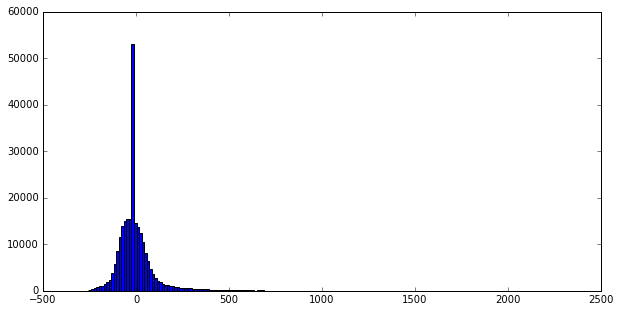

DER_mass_transverse_met_lep
nunuqie:  101637 / 250000
count    2.500000e+05
mean     2.089109e-15
std      4.923992e+01
min     -6.859733e+01
25%     -4.179217e+01
50%     -3.783481e+00
75%      3.393404e+01
max      8.927649e+02
Name: DER_mass_transverse_met_lep, dtype: float64


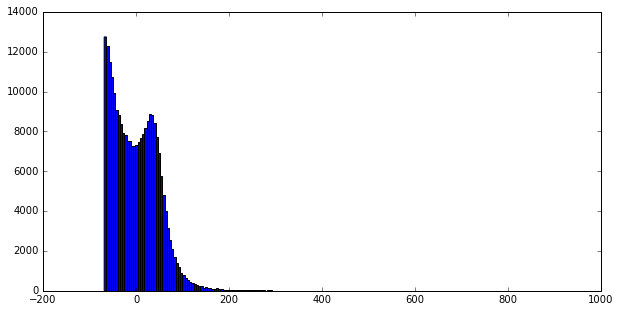

DER_mass_vis
nunuqie:  100558 / 250000
count    2.500000e+05
mean     5.220314e-12
std      7.687758e+01
min     -5.296221e+02
25%     -4.014723e+01
50%      7.019619e-01
75%      4.022138e+01
max      4.487216e+02
Name: DER_mass_vis, dtype: float64


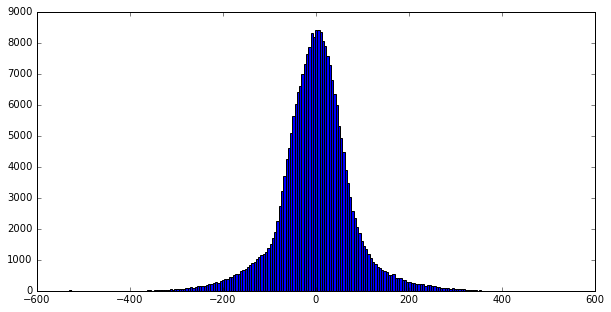

DER_pt_h
nunuqie:  115563 / 250000
count    2.500000e+05
mean     2.495653e-15
std      5.789608e+01
min     -5.265750e+01
25%     -3.986170e+01
50%     -1.767056e+01
75%      1.934824e+01
max      2.525829e+03
Name: DER_pt_h, dtype: float64


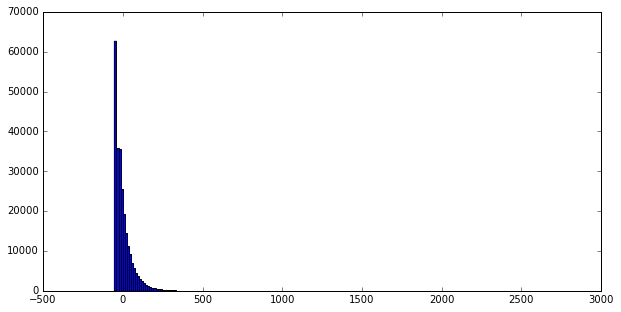

DER_deltaeta_jet_jet
nunuqie:  7086 / 250000
count    2.500000e+05
mean    -7.131007e-16
std      2.193109e+00
min     -5.072981e+00
25%     -1.991720e-01
50%     -1.991720e-01
75%     -1.991720e-01
max      1.459574e+01
Name: DER_deltaeta_jet_jet, dtype: float64


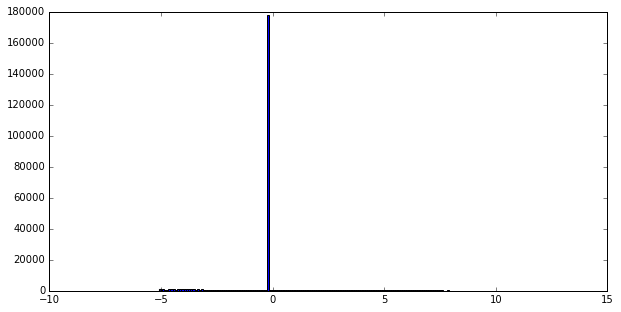

DER_mass_jet_jet
nunuqie:  68365 / 250000
count    2.500000e+05
mean    -2.102315e-13
std      2.682212e+02
min     -3.045721e+02
25%     -5.064142e+01
50%     -5.064142e+01
75%     -5.064142e+01
max      5.630175e+03
Name: DER_mass_jet_jet, dtype: float64


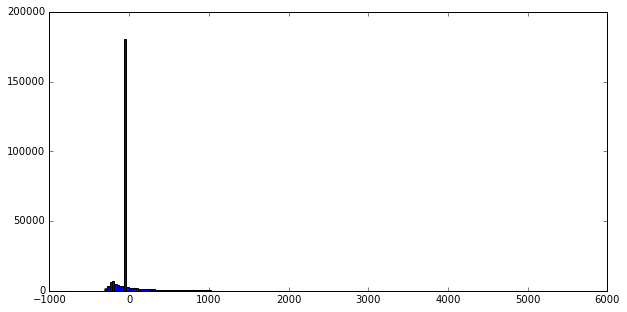

DER_prodeta_jet_jet
nunuqie:  16592 / 250000
count    2.500000e+05
mean    -4.973799e-19
std      4.116298e-01
min     -3.612762e+00
25%     -3.541203e-02
50%     -3.541203e-02
75%     -3.541203e-02
max      3.729530e+00
Name: DER_prodeta_jet_jet, dtype: float64


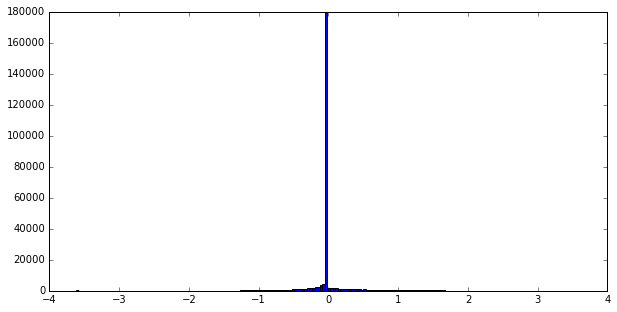

DER_deltar_tau_lep
nunuqie:  4692 / 250000
count    2.500000e+05
mean    -1.216449e-15
std      2.373105e+00
min     -6.562697e+00
25%     -1.706828e+00
50%      3.588861e-01
75%      1.782001e+00
max      1.003577e+01
Name: DER_deltar_tau_lep, dtype: float64


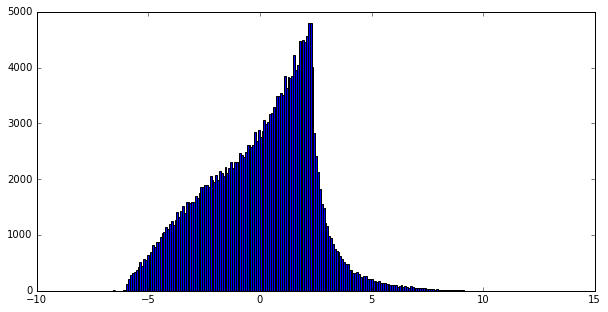

DER_pt_tot
nunuqie:  59042 / 250000
count    2.500000e+05
mean    -8.604729e-15
std      1.891737e+01
min     -1.606691e+01
25%     -1.365398e+01
50%     -5.607082e+00
75%      7.366737e+00
max      2.391760e+03
Name: DER_pt_tot, dtype: float64


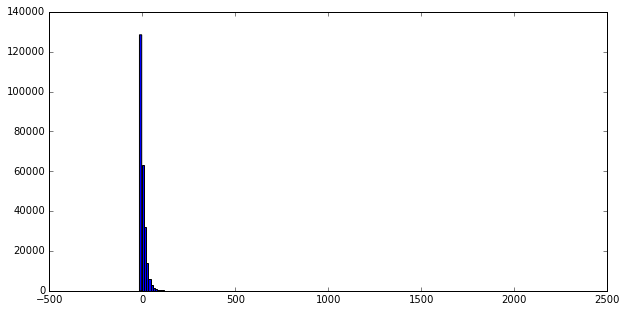

DER_sum_pt
nunuqie:  156098 / 250000
count    2.500000e+05
mean    -1.640001e-14
std      1.584325e+02
min     -1.538073e+02
25%     -1.107493e+02
50%     -5.171408e+01
75%      5.757223e+01
max      2.319579e+03
Name: DER_sum_pt, dtype: float64


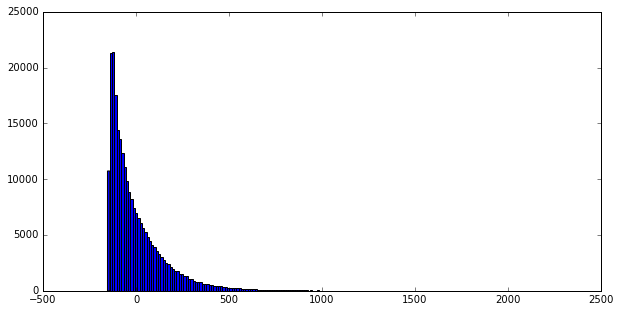

DER_pt_ratio_lep_tau
nunuqie:  5931 / 250000
count    2.500000e+05
mean     2.801244e-16
std      1.220726e+00
min     -6.176979e+00
25%     -7.991561e-01
50%     -6.690314e-02
75%      7.618262e-01
max      7.308755e+00
Name: DER_pt_ratio_lep_tau, dtype: float64


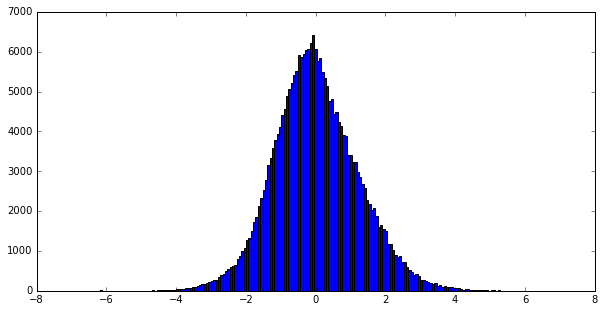

DER_met_phi_centrality
nunuqie:  2829 / 250000
count    2.500000e+05
mean     3.904432e-18
std      1.283050e-01
min     -1.657908e-01
25%     -1.454741e-01
50%      2.447621e-02
75%      1.335841e-01
max      1.382064e-01
Name: DER_met_phi_centrality, dtype: float64


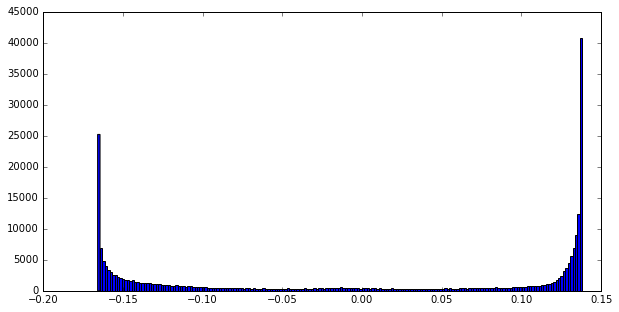

DER_lep_eta_centrality
nunuqie:  1001 / 250000
count    2.500000e+05
mean     3.820446e-16
std      4.552457e-01
min     -9.649869e-01
25%     -2.638573e-03
50%     -2.638573e-03
75%     -2.638573e-03
max      1.154723e+00
Name: DER_lep_eta_centrality, dtype: float64


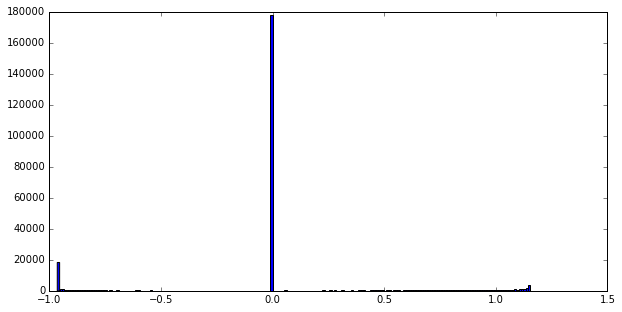

PRI_tau_pt
nunuqie:  59639 / 250000
count    2.500000e+05
mean     1.567696e-14
std      3.870750e+01
min     -3.230924e+01
25%     -2.437892e+01
50%     -1.192277e+01
75%      1.089716e+01
max      1.253344e+03
Name: PRI_tau_pt, dtype: float64


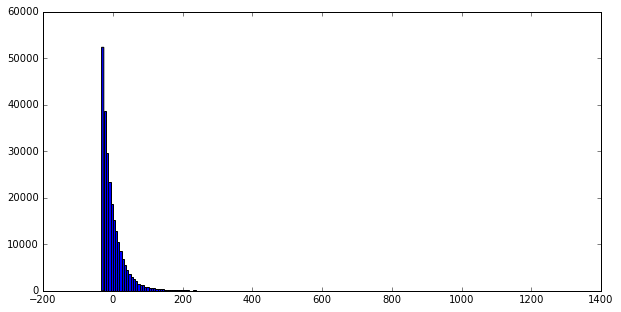

PRI_tau_eta
nunuqie:  4971 / 250000
count    2.500000e+05
mean    -1.421085e-19
std      1.097307e-02
min     -2.266753e-02
25%     -8.215468e-03
50%      1.087018e-04
75%      8.261147e-03
max      2.248725e-02
Name: PRI_tau_eta, dtype: float64


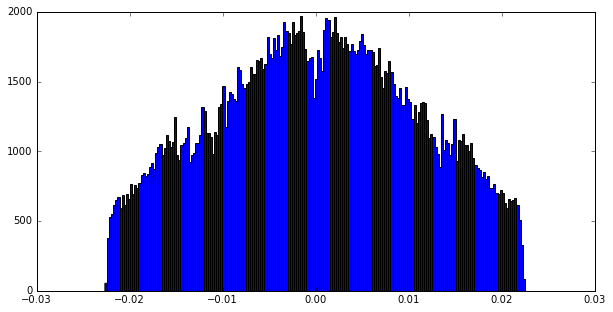

PRI_tau_phi
nunuqie:  6285 / 250000
count    2.500000e+05
mean    -1.949552e-19
std      8.171088e-03
min     -1.416824e-02
25%     -7.075507e-03
50%      1.116708e-04
75%      7.046983e-03
max      1.409473e-02
Name: PRI_tau_phi, dtype: float64


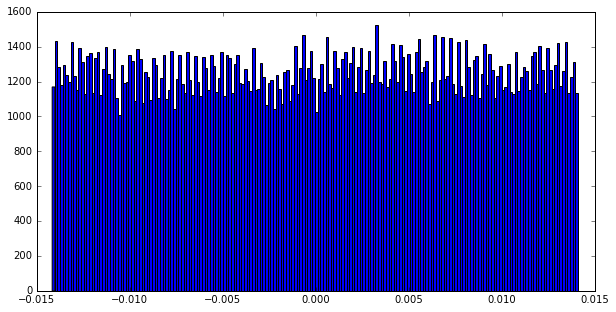

PRI_lep_pt
nunuqie:  61929 / 250000
count    2.500000e+05
mean    -2.770867e-14
std      4.666030e+01
min     -4.368977e+01
25%     -3.020867e+01
50%     -1.299305e+01
75%      1.423137e+01
max      1.086124e+03
Name: PRI_lep_pt, dtype: float64


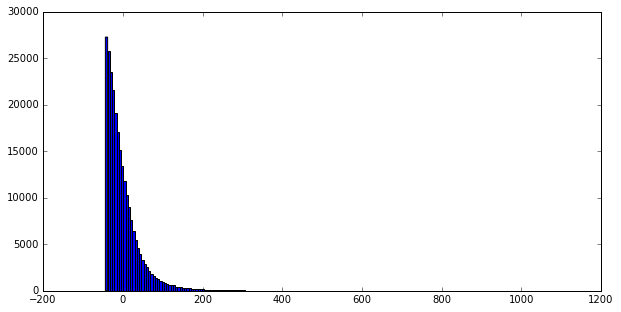

PRI_lep_eta
nunuqie:  4987 / 250000
count    2.500000e+05
mean    -2.398082e-19
std      1.950751e-02
min     -3.890002e-02
25%     -1.508973e-02
50%      3.931247e-04
75%      1.533624e-02
max      3.832921e-02
Name: PRI_lep_eta, dtype: float64


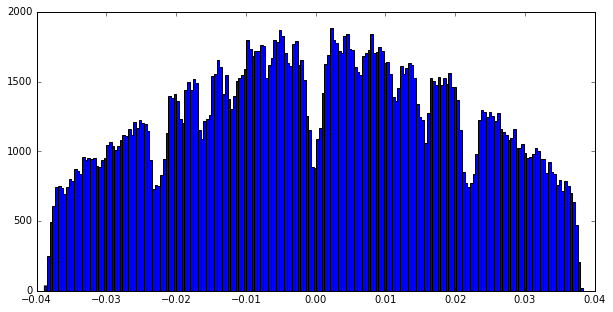

PRI_lep_phi
nunuqie:  6285 / 250000
count    2.500000e+05
mean     1.652012e-18
std      4.354305e-02
min     -7.635550e-02
25%     -3.752510e-02
50%      1.017669e-03
75%      3.773876e-02
max      7.426810e-02
Name: PRI_lep_phi, dtype: float64


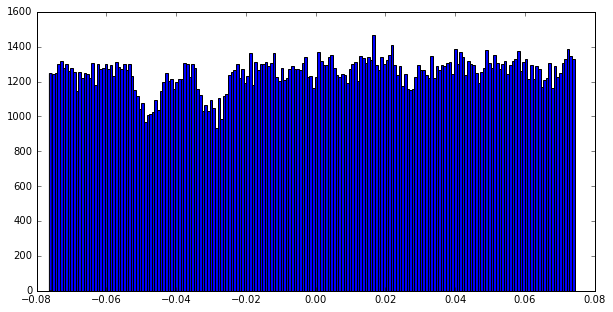

PRI_met
nunuqie:  87836 / 250000
count    2.500000e+05
mean    -3.494606e-13
std      3.824219e+01
min     -2.269310e+02
25%     -2.402939e+01
50%     -3.778673e+00
75%      2.087294e+01
max      2.884701e+02
Name: PRI_met, dtype: float64


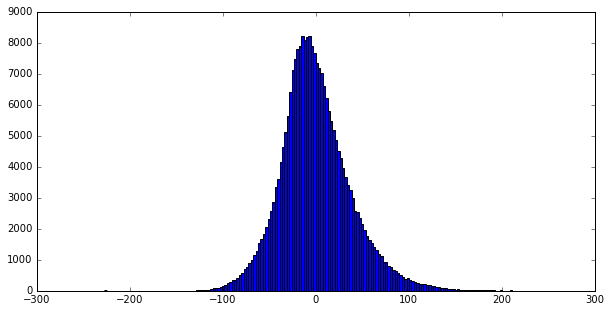

PRI_met_phi
nunuqie:  6285 / 250000
count    2.500000e+05
mean     2.446932e-19
std      1.011921e-02
min     -1.760102e-02
25%     -8.772922e-03
50%      7.750860e-05
75%      8.738088e-03
max      1.748801e-02
Name: PRI_met_phi, dtype: float64


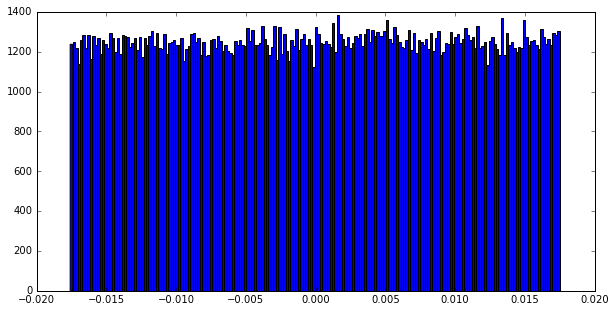

PRI_met_sumet
nunuqie:  179740 / 250000
count    2.500000e+05
mean     2.615406e-11
std      2.046125e+02
min     -8.619167e+02
25%     -1.384936e+02
50%     -2.282625e+00
75%      1.328910e+02
max      9.159350e+02
Name: PRI_met_sumet, dtype: float64


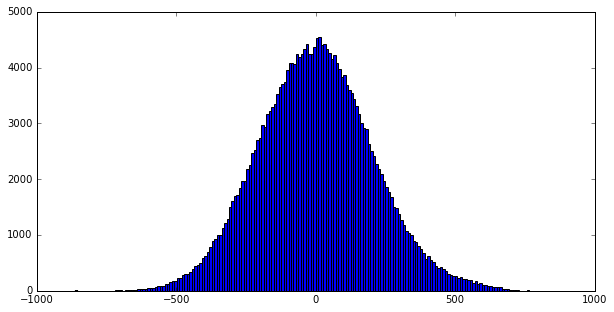

PRI_jet_leading_pt
nunuqie:  86589 / 250000
count    2.500000e+05
mean     9.604264e-16
std      7.712452e+01
min     -7.581251e+01
25%     -3.166933e+01
50%     -1.860286e+01
75%     -2.856164e+00
max      1.678674e+03
Name: PRI_jet_leading_pt, dtype: float64


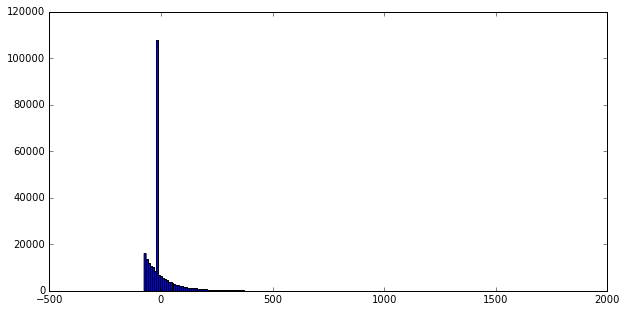

PRI_jet_leading_eta
nunuqie:  8557 / 250000
count    2.500000e+05
mean     4.934941e-20
std      1.965896e-03
min     -6.399371e-03
25%     -6.184246e-04
50%     -2.795060e-06
75%      6.128345e-04
max      6.393780e-03
Name: PRI_jet_leading_eta, dtype: float64


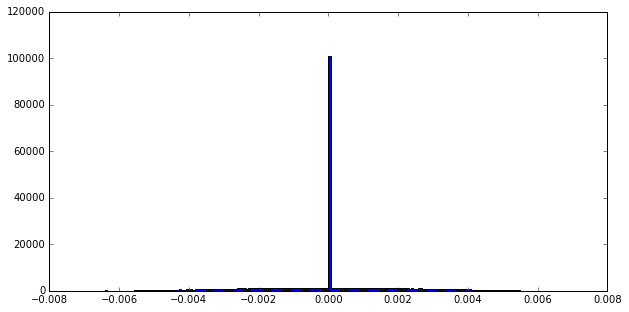

PRI_jet_leading_phi
nunuqie:  6284 / 250000
count    2.500000e+05
mean    -2.788880e-19
std      2.062857e-02
min     -4.641705e-02
25%     -7.687587e-03
50%      1.816303e-04
75%      7.859989e-03
max      4.582602e-02
Name: PRI_jet_leading_phi, dtype: float64


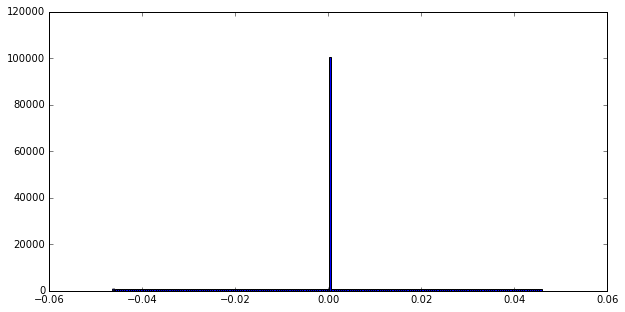

PRI_jet_subleading_pt
nunuqie:  42463 / 250000
count    2.500000e+05
mean    -2.506931e-14
std      5.073925e+01
min     -5.914349e+01
25%     -8.090925e+00
50%     -8.090925e+00
75%     -8.090925e+00
max      1.912737e+03
Name: PRI_jet_subleading_pt, dtype: float64


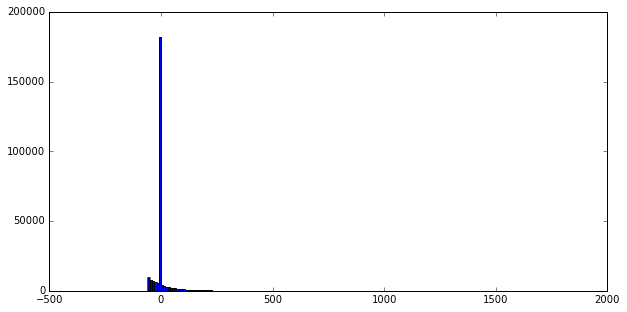

PRI_jet_subleading_eta
nunuqie:  8627 / 250000
count    2.500000e+05
mean     9.205969e-19
std      1.053547e-02
min     -4.341976e-02
25%     -5.154343e-06
50%     -5.154343e-06
75%     -5.154343e-06
max      4.321692e-02
Name: PRI_jet_subleading_eta, dtype: float64


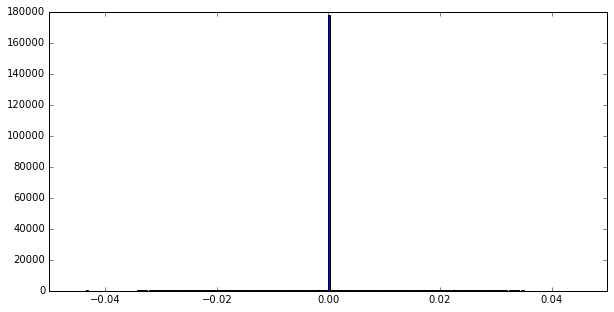

PRI_jet_subleading_phi
nunuqie:  6285 / 250000
count    2.500000e+05
mean     1.195155e-19
std      1.878796e-03
min     -6.034994e-03
25%      2.326710e-07
50%      2.326710e-07
75%      2.326710e-07
max      6.027781e-03
Name: PRI_jet_subleading_phi, dtype: float64


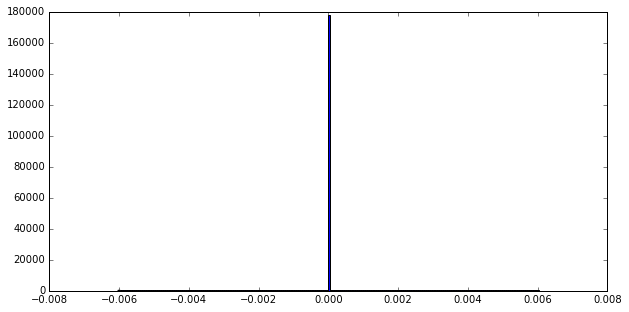

PRI_jet_all_pt
nunuqie:  103559 / 250000
count    2.500000e+05
mean    -1.844091e-14
std      7.306474e+01
min     -5.446523e+01
25%     -5.446523e+01
50%     -2.426561e+01
75%      2.748372e+01
max      1.163160e+03
Name: PRI_jet_all_pt, dtype: float64


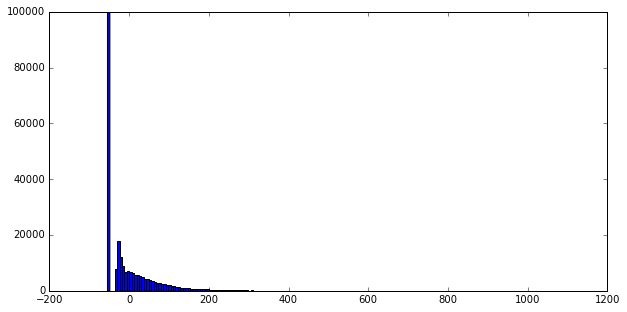

DER_pt_tot_log
nunuqie:  59042 / 250000
count    2.500000e+05
mean    -5.399841e-16
std      2.173333e+00
min     -1.023309e+01
25%     -1.699339e+00
50%      5.107740e-01
75%      1.727818e+00
max      8.720390e+00
Name: DER_pt_tot_log, dtype: float64


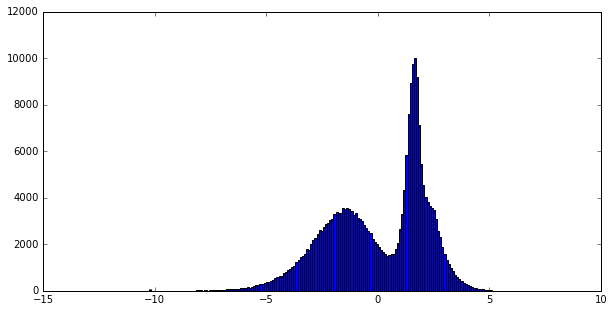

DER_sum_pt_log
nunuqie:  156098 / 250000
count    2.500000e+05
mean    -6.697519e-15
std      4.864524e+00
min     -8.246182e+00
25%     -4.097265e+00
50%     -5.698867e-01
75%      3.481068e+00
max      2.122405e+01
Name: DER_sum_pt_log, dtype: float64


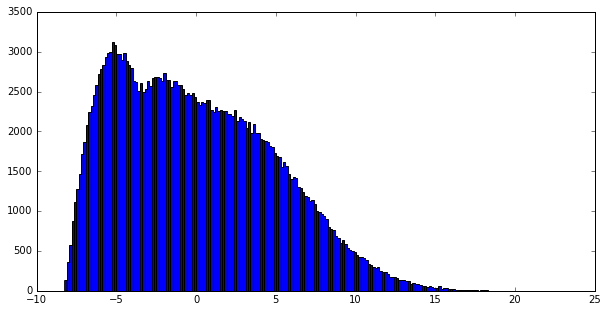

In [25]:
for c in train.columns:
    if len(np.unique(train[c]))<100:
        continue
    print c
    print 'nunuqie: ', len(np.unique(train[c])), '/', len(train[c])
    print train[c].describe()
    plt.figure(figsize=(10,5))
    plt.hist(train[c], bins=200)
    plt.show()
    if len(train[train[c]<=0.]) > 40:
        continue
    print 'log of', c
    plt.hist(np.log(train[train[c]>0][c]), bins=200)
    plt.show()

### Многие фичи имеют логнормальное распределение:

DER_pt_ratio_lep_tau

DER_mass_vis 

PRI_met

PRI_met_sumet

### Добавим log вместо них, а также добавим log следующих колонок (заодно отнормируем еще раз)
DER_pt_tot

DER_sum_pt

### потому что они похожи на логарифм гамма-распределения



In [10]:
log_cols = ['DER_pt_ratio_lep_tau', 'DER_mass_vis', 'PRI_met', 'PRI_met_sumet']
for col in log_cols:
    train[col] = np.log(train[col]) - [np.mean(train[col])]*len(train)
    test[col] = np.log(test[col]) - [np.mean(test[col])]*len(test)

In [11]:
train['DER_pt_tot'].describe()

count    250000.000000
mean         18.917332
std          22.273494
min           0.000000
25%           2.841000
50%          12.315500
75%          27.591000
max        2834.999000
Name: DER_pt_tot, dtype: float64

In [12]:
gamma_log_cols = ['DER_pt_tot', 'DER_sum_pt']
for col in gamma_log_cols:
    # прибавим epsilon, там некоторые - нули
    train[col+'_log'] = np.log(train[col] + [.01]*len(train)) 
    test[col+'_log'] = np.log(test[col] + [.01]*len(test)) 

In [13]:
train.shape, test.shape

((250000, 43), (550000, 43))

### Отнормируем все фичи
кроме PRI_jet_num (это категориальный признак) и всех заканчивающихся на is_na

In [14]:
cols = set(train.columns) - set(['PRI_jet_num']) 
cols = cols - set(cat_cols)

len(cols)

31

In [15]:
from scipy.stats import variation as var
for c in cols:
    train[c] = (train[c] - [train[c].mean()]*len(train))*(1./var(train[c]))
    test[c] = (test[c] - [test[c].mean()]*len(test))*(1./var(test[c]))

### Векторизуем PRI_jet_num (4 значения)

In [16]:
print len(np.unique(train['PRI_jet_num'])), len(np.unique(test['PRI_jet_num']))

4 4


In [17]:
train_dummy_enc = pd.get_dummies(train['PRI_jet_num'])
test_dummy_enc = pd.get_dummies(test['PRI_jet_num'])

colnames = ['PRI_jet_num_0', 'PRI_jet_num_1', 'PRI_jet_num_2', 'PRI_jet_num_3']
train_dummy_enc.columns = colnames
test_dummy_enc.columns = colnames

train = pd.concat([train, train_dummy_enc], axis=1)
test = pd.concat([test, test_dummy_enc], axis=1)

del train['PRI_jet_num'], test['PRI_jet_num']

In [18]:
train.shape, test.shape

((250000, 46), (550000, 46))

In [19]:
train.head(1)

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_jet_leading_phi_is_na,PRI_jet_subleading_pt_is_na,PRI_jet_subleading_eta_is_na,PRI_jet_subleading_phi_is_na,DER_pt_tot_log,DER_sum_pt_log,PRI_jet_num_0,PRI_jet_num_1,PRI_jet_num_2,PRI_jet_num_3
0,41.12524,3.364654,-50.838982,-27.209148,-2.968014,-171.664687,-0.650157,2.094207,19.543468,53.850225,...,0,0,0,0,2.359361,3.372138,0.0,0.0,1.0,0.0


In [20]:
test.head(1)

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_jet_leading_phi_is_na,PRI_jet_subleading_pt_is_na,PRI_jet_subleading_eta_is_na,PRI_jet_subleading_phi_is_na,DER_pt_tot_log,DER_sum_pt_log,PRI_jet_num_0,PRI_jet_num_1,PRI_jet_num_2,PRI_jet_num_3
0,-18.163781,42.172742,207.317568,-50.056701,-0.205678,-50.842501,-0.036367,-4.478105,-13.91562,-140.102087,...,1,1,1,1,-1.602056,-6.683526,1.0,0.0,0.0,0.0


In [21]:
train.to_csv('train_preprocessed.csv')
test.to_csv('test_preprocessed.csv')
pd.DataFrame(weights_train).to_csv('weights_train.csv')
pd.DataFrame(y_train).to_csv('y_train.csv')

In [22]:
train.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_jet_leading_phi_is_na,PRI_jet_subleading_pt_is_na,PRI_jet_subleading_eta_is_na,PRI_jet_subleading_phi_is_na,DER_pt_tot_log,DER_sum_pt_log,PRI_jet_num_0,PRI_jet_num_1,PRI_jet_num_2,PRI_jet_num_3
count,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,...,250000.000000,250000.000000,250000.000000,250000.000000,2.500000e+05,2.500000e+05,250000.000000,250000.000000,250000.000000,250000.000000
mean,2.696470e-14,2.089109e-15,5.220314e-12,2.495653e-15,-7.131007e-16,-2.102315e-13,-4.973799e-19,-1.216449e-15,-8.604729e-15,-1.640001e-14,...,0.399652,0.709828,0.709828,0.709828,-5.399841e-16,-6.697519e-15,0.399652,0.310176,0.201516,0.088656
std,1.204177e+02,4.923992e+01,7.687758e+01,5.789608e+01,2.193109e+00,2.682212e+02,4.116298e-01,2.373105e+00,1.891737e+01,1.584325e+02,...,0.489828,0.453843,0.453843,0.453843,2.173333e+00,4.864524e+00,0.489828,0.462566,0.401133,0.284247
min,-2.537179e+02,-6.859733e+01,-5.296221e+02,-5.265750e+01,-5.072981e+00,-3.045721e+02,-3.612762e+00,-6.562697e+00,-1.606691e+01,-1.538073e+02,...,0.000000,0.000000,0.000000,0.000000,-1.023309e+01,-8.246182e+00,0.000000,0.000000,0.000000,0.000000
25%,-5.638809e+01,-4.179217e+01,-4.014723e+01,-3.986170e+01,-1.991720e-01,-5.064142e+01,-3.541203e-02,-1.706828e+00,-1.365398e+01,-1.107493e+02,...,0.000000,0.000000,0.000000,0.000000,-1.699339e+00,-4.097265e+00,0.000000,0.000000,0.000000,0.000000
50%,-1.825071e+01,-3.783481e+00,7.019619e-01,-1.767056e+01,-1.991720e-01,-5.064142e+01,-3.541203e-02,3.588861e-01,-5.607082e+00,-5.171408e+01,...,0.000000,1.000000,1.000000,1.000000,5.107740e-01,-5.698867e-01,0.000000,0.000000,0.000000,0.000000
75%,2.321097e+01,3.393404e+01,4.022138e+01,1.934824e+01,-1.991720e-01,-5.064142e+01,-3.541203e-02,1.782001e+00,7.366737e+00,5.757223e+01,...,1.000000,1.000000,1.000000,1.000000,1.727818e+00,3.481068e+00,1.000000,1.000000,0.000000,0.000000
max,2.441213e+03,8.927649e+02,4.487216e+02,2.525829e+03,1.459574e+01,5.630175e+03,3.729530e+00,1.003577e+01,2.391760e+03,2.319579e+03,...,1.000000,1.000000,1.000000,1.000000,8.720390e+00,2.122405e+01,1.000000,1.000000,1.000000,1.000000


In [23]:
test.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_jet_leading_phi_is_na,PRI_jet_subleading_pt_is_na,PRI_jet_subleading_eta_is_na,PRI_jet_subleading_phi_is_na,DER_pt_tot_log,DER_sum_pt_log,PRI_jet_num_0,PRI_jet_num_1,PRI_jet_num_2,PRI_jet_num_3
count,5.500000e+05,5.500000e+05,5.500000e+05,5.500000e+05,5.500000e+05,5.500000e+05,5.500000e+05,5.500000e+05,5.500000e+05,5.500000e+05,...,550000.000000,550000.000000,550000.000000,550000.000000,5.500000e+05,5.500000e+05,550000.000000,550000.000000,550000.000000,550000.000000
mean,-4.975763e-15,-1.599801e-14,4.120510e-12,1.247248e-15,2.988284e-16,2.258358e-14,-2.104660e-17,6.435192e-16,2.014117e-15,1.811383e-14,...,0.400284,0.708858,0.708858,0.708858,1.340859e-15,-7.248053e-16,0.400284,0.308575,0.201829,0.089313
std,1.204551e+02,4.926114e+01,7.681907e+01,5.782485e+01,2.188341e+00,2.688058e+02,4.150627e-01,2.374078e+00,1.898829e+01,1.586599e+02,...,0.489956,0.454289,0.454289,0.454289,2.175269e+00,4.865122e+00,0.489956,0.461905,0.401366,0.285195
min,-2.560327e+02,-6.850045e+01,-5.204931e+02,-5.283048e+01,-5.038032e+00,-3.026838e+02,-3.764821e+00,-6.505477e+00,-1.656401e+01,-1.536357e+02,...,0.000000,0.000000,0.000000,0.000000,-1.023389e+01,-8.234478e+00,0.000000,0.000000,0.000000,0.000000
25%,-5.700224e+01,-4.164459e+01,-4.012225e+01,-3.986424e+01,-2.056777e-01,-5.084250e+01,-3.636664e-02,-1.701885e+00,-1.408834e+01,-1.108196e+02,...,0.000000,0.000000,0.000000,0.000000,-1.703501e+00,-4.101898e+00,0.000000,0.000000,0.000000,0.000000
50%,-1.816378e+01,-3.901343e+00,7.827533e-01,-1.768359e+01,-2.056777e-01,-5.084250e+01,-3.636664e-02,3.589723e-01,-5.755862e+00,-5.181157e+01,...,0.000000,1.000000,1.000000,1.000000,5.168376e-01,-5.710994e-01,0.000000,0.000000,0.000000,0.000000
75%,2.371691e+01,3.390865e+01,4.039452e+01,1.956032e+01,-2.056777e-01,-5.084250e+01,-3.636664e-02,1.789700e+00,7.554992e+00,5.781740e+01,...,1.000000,1.000000,1.000000,1.000000,1.727702e+00,3.490629e+00,1.000000,1.000000,0.000000,0.000000
max,4.205329e+03,1.278491e+03,4.377070e+02,1.168864e+03,1.504651e+01,5.404335e+03,3.953577e+00,1.027970e+01,6.458497e+02,2.621413e+03,...,1.000000,1.000000,1.000000,1.000000,6.727408e+00,2.209569e+01,1.000000,1.000000,1.000000,1.000000
